In [1]:
yfinance, pandas, numpy, xgboost, matplotlib, seaborn, scikit-learn


NameError: name 'yfinance' is not defined

In [2]:
!pip install yfinance


/tmp/ipython-input-2679668822.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("GC=F", start="2010-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


RMSE: 265.6967550140573
R2 Score: 0.15699869394302368


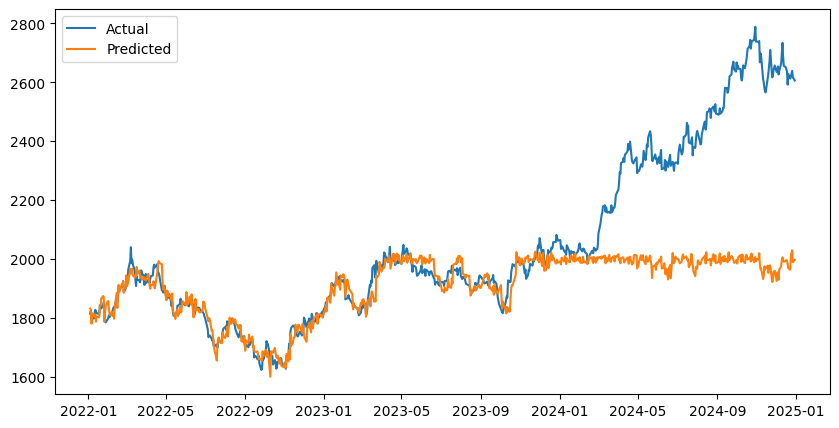

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Download Gold Price Data
df = yf.download("GC=F", start="2010-01-01", end="2024-12-31")

# Feature engineering
df['Return'] = df['Close'].pct_change()
df['MA_10'] = df['Close'].rolling(10).mean()
df['MA_20'] = df['Close'].rolling(20).mean()
df['Volatility'] = df['Return'].rolling(10).std()

df = df.dropna()

X = df[['Return', 'MA_10', 'MA_20', 'Volatility']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

# Plot predictions
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.legend()
plt.show()
